# POIs comparison: Nami vs measurements

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

tseries = pd.read_json('../tsunamilab/pois (6)')
tseries

,anto,aric,buca,cald,chnr,const,coqu,huas2,iqui,meji,papo,pata,pich2,pisa,qtro,sano,talt2,toco2,valp
closestDeepPoint,"[333, 740]","[336, 1048]","[233, 82]","[307, 538]","[316, 578]","[205, 42]","[275, 364]","[284, 454]","[347, 948]","[332, 779]","[329, 658]","[344, 913]","[265, 232]","[345, 982]","[264, 193]","[260, 147]","[330, 638]","[345, 832]","[261, 180]"
closestDeepPointDepth,105,110,103,102,113,105,103.009,115,108,112,116,106,136.004,120,104.999,125,106,108,105
depth,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
location,"[-70.404441, -23.653133]","[-70.3232305, -18.4758]","[-72.046235, -34.639379]","[-70.82471944, -27.0646055]","[-70.633759, -26.351758]","[-72.457981, -35.356061]","[-71.335258, -29.950121]","[-71.223832, -28.460820000000002]","[-70.14783056, -20.20457778]","[-70.450663, -23.097712]","[-70.468728, -25.008982]","[-70.198029, -20.803213]","[-71.529306, -32.135611]","[-70.215639, -19.596907]","[-71.525427, -32.775493]","[-71.618188, -33.581625]","[-70.491683, -25.408105]","[-70.211537, -22.093748]","[-71.6259388, -33.02730833]"
originalPixel,"[335, 740]","[340, 1051]","[237, 82]","[310, 536]","[321, 578]","[212, 39]","[279, 363]","[286, 452]","[350, 947]","[332, 773]","[331, 659]","[347, 911]","[267, 232]","[346, 983]","[268, 193]","[262, 145]","[330, 635]","[346, 834]","[262, 178]"
pixel,"[333, 740]","[336, 1048]","[233, 82]","[307, 538]","[316, 578]","[205, 42]","[275, 364]","[284, 454]","[347, 948]","[332, 779]","[329, 658]","[344, 913]","[265, 232]","[345, 982]","[264, 193]","[260, 147]","[330, 638]","[345, 832]","[261, 180]"
shallowCorrectionFactor,3.20109,3.23853,3.18573,3.17797,3.26039,3.20109,3.1858,3.27472,3.22371,3.25315,3.28182,3.20868,3.41498,3.30975,3.20108,3.3437,3.20868,3.22371,3.20109
surface,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.027552403395844003, 0.027549148589279003, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.012418735438032001, 0.01241664747653, 0.012...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.00241047789079, -0.002412177010223, -0.002...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, -1.0704911510000002e-06, -3.21523767300000..."
time,"[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055...","[2.666852350665264, 5.333704701330529, 8.00055..."


In [4]:
groups = [['aric', 'pisa', 'iqui', 'pata', 'toco2', 'meji', 'anto'], 
          ['papo', 'talt2', 'chnr', 'cald', 'huas2', 'coqu'],
          ['pich2', 'qtro', 'valp', 'sano', 'buca', 'const']]

In [8]:
x0 = -76
x1 = -70
y0 = -36
y1 = -16

ny,nx = (1200,360)
bathymetry = np.fromfile('../data/bathymetry',dtype='float64')[2:].reshape((ny,nx))
h0 = np.loadtxt('../tsunamilab/tlab2D (13)',delimiter=',',skiprows=1).reshape((ny,nx))

In [18]:
hmax = np.loadtxt('../tsunamilab/tlab2D (14)',delimiter=',',skiprows=1).reshape((ny,nx))
arrivals = np.loadtxt('../tsunamilab/tlab2D (15)',delimiter=',',skiprows=1).reshape((ny,nx))

x = np.linspace(x0,x1, bathymetry.shape[1])
y = np.linspace(y0,y1, bathymetry.shape[0])
x, y = np.meshgrid(x, y)

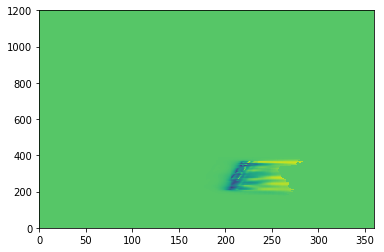

In [19]:
plt.pcolormesh(hmax)

/home/jose/gitrepos/Nami/asdf/lib/python3.6/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


[3. 8.]


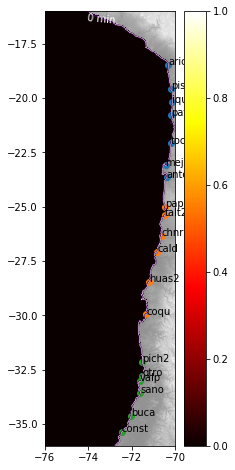

In [20]:
plt.pcolormesh(x,y,bathymetry,cmap = plt.cm.gray_r)
plt.pcolormesh(x,y,np.ma.masked_array(hmax, bathymetry<0), vmax=1, vmin=0.0, cmap = plt.cm.hot)
plt.colorbar()
plt.contour(x,y,bathymetry,[0.0])
c = plt.contour(x,y,arrivals/60,np.arange(0,120,20), colors='w', linewidths=0.5)
plt.clabel(c,fmt='%i min.')
for i in range(3):
    points = np.array([tseries[column]['location'] for column in groups[i]])
    plt.scatter(points[:,0],points[:,1])
    
for column in tseries.columns:
    plt.text(tseries[column]['location'][0],tseries[column]['location'][1],column, color='k')
plt.gca().set_aspect(1)
plt.gcf().set_size_inches((3,8))
print(plt.gcf().get_size_inches())

In [21]:
print([len(group) for group in groups])

[7, 6, 6]


# Time series plots

In [22]:
te = pd.datetime(2015, 9, 16, 22, 54, 31) #+ pd.to_timedelta('0.2 hours')
t0 = te - pd.to_timedelta('1 hour')
tf = te + pd.to_timedelta('6 hour')
print(t0,tf)

2015-09-16 21:54:31 2015-09-17 04:54:31


In [23]:
import matplotlib.dates as mdates

In [24]:
hours = mdates.HourLocator()
hoursFmt = mdates.DateFormatter('%H')

In [25]:
earthquakeDate = pd.to_datetime('2015-09-16 22:54:33') #+ pd.to_timedelta('12 minutes')
tearthquake = earthquakeDate.to_julian_date()

In [32]:
!cat ../data/anto.csv

,Time (UTC),prs(m),rad(m)
0,2015-09-01 00:00:00,3.551,5.519
1,2015-09-01 00:01:00,3.54,5.5120000000000005
2,2015-09-01 00:02:00,3.571,5.521
3,2015-09-01 00:03:00,3.588,5.5360000000000005
4,2015-09-01 00:04:00,3.605,5.546
5,2015-09-01 00:05:00,3.622,5.544
6,2015-09-01 00:06:00,3.58,5.545
7,2015-09-01 00:07:00,3.575,5.542000000000001
8,2015-09-01 00:08:00,3.616,5.56
9,2015-09-01 00:09:00,3.6210000000000004,5.58
10,2015-09-01 00:10:00,3.6460000000000004,5.574
11,2015-09-01 00:11:00,3.642,5.577999999999999
12,2015-09-01 00:12:00,3.627,5.582999999999999
13,2015-09-01 00:13:00,3.638,5.5920000000000005
14,2015-09-01 00:14:00,3.602,5.607
15,2015-09-01 00:15:00,3.6439999999999997,5.605
16,2015-09-01 00:16:00,3.64,5.608
17,2015-09-01 00:17:00,3.661,5.601
18,2015-09-01 00:18:00,3.682,5.608
19,2015-09-01 00:19:00,3.6430000000000002,5.627999999999999
20,2015-09-01 00:20:00,3.654,5.624
21,2015-09-01 00:21:00,3.6430000000000002,5.627000000000001
22,2015-09-01 00:22:00,3.6719999999999997,5.62200000000

11081,2015-09-08 19:41:00,3.4130000000000003,5.365
11082,2015-09-08 19:42:00,3.4210000000000003,5.372999999999999
11083,2015-09-08 19:43:00,3.426,5.38
11084,2015-09-08 19:44:00,3.4189999999999996,5.375
11085,2015-09-08 19:45:00,3.412,5.374
11086,2015-09-08 19:46:00,3.412,5.374
11087,2015-09-08 19:47:00,3.4130000000000003,5.382000000000001
11088,2015-09-08 19:48:00,3.4330000000000003,5.386
11089,2015-09-08 19:49:00,3.4419999999999997,5.393
11090,2015-09-08 19:50:00,3.464,5.403
11091,2015-09-08 19:51:00,3.427,5.4079999999999995
11092,2015-09-08 19:52:00,3.449,5.4110000000000005
11093,2015-09-08 19:53:00,3.44,5.414
11094,2015-09-08 19:54:00,3.45,5.416
11095,2015-09-08 19:55:00,3.4419999999999997,5.412999999999999
11096,2015-09-08 19:56:00,3.455,5.4110000000000005
11097,2015-09-08 19:57:00,3.4530000000000003,5.417000000000001
11098,2015-09-08 19:58:00,3.471,5.422000000000001
11099,2015-09-08 19:59:00,3.4610000000000003,5.422999999999999
11100,2015-09-08 20:00:00,3.45,5.428999999999999
1110

22141,2015-09-16 16:26:00,3.741,5.715
22142,2015-09-16 16:27:00,3.722,5.711
22143,2015-09-16 16:28:00,3.752,5.71
22144,2015-09-16 16:29:00,3.735,5.7139999999999995
22145,2015-09-16 16:30:00,3.7319999999999998,5.7139999999999995
22146,2015-09-16 16:31:00,3.7319999999999998,5.711
22147,2015-09-16 16:32:00,3.727,5.71
22148,2015-09-16 16:33:00,3.7230000000000003,5.704
22149,2015-09-16 16:34:00,3.737,5.7
22150,2015-09-16 16:35:00,3.7310000000000003,5.7
22151,2015-09-16 16:36:00,3.738,5.705
22152,2015-09-16 16:37:00,3.697,5.702000000000001
22153,2015-09-16 16:38:00,3.7110000000000003,5.692
22154,2015-09-16 16:39:00,3.69,5.686
22155,2015-09-16 16:40:00,3.7,5.681
22156,2015-09-16 16:41:00,3.71,5.68
22157,2015-09-16 16:42:00,3.707,5.681
22158,2015-09-16 16:43:00,3.693,5.68
22159,2015-09-16 16:44:00,3.701,5.675
22160,2015-09-16 16:45:00,3.7039999999999997,5.675
22161,2015-09-16 16:46:00,3.698,5.672999999999999
22162,2015-09-16 16:47:00,3.667,5.667000000000001
22163,2015-09-16 16:48:00,3.675,5.65

32843,2015-09-24 05:43:00,3.3339999999999996,5.303999999999999
32844,2015-09-24 05:44:00,3.3339999999999996,5.31
32845,2015-09-24 05:45:00,3.3089999999999997,5.312
32846,2015-09-24 05:46:00,3.321,5.309
32847,2015-09-24 05:47:00,3.319,5.308
32848,2015-09-24 05:48:00,3.3139999999999996,5.309
32849,2015-09-24 05:49:00,3.321,5.305
32850,2015-09-24 05:50:00,3.3289999999999997,5.303999999999999
32851,2015-09-24 05:51:00,3.326,5.308
32852,2015-09-24 05:52:00,3.3280000000000003,5.309
32853,2015-09-24 05:53:00,3.325,5.307
32854,2015-09-24 05:54:00,3.34,5.308
32855,2015-09-24 05:55:00,3.344,5.317
32856,2015-09-24 05:56:00,3.3539999999999996,5.318
32857,2015-09-24 05:57:00,3.352,5.3260000000000005
32858,2015-09-24 05:58:00,3.35,5.3260000000000005
32859,2015-09-24 05:59:00,3.364,5.334
32860,2015-09-24 06:00:00,3.366,5.3389999999999995
32861,2015-09-24 06:01:00,3.375,5.345
32862,2015-09-24 06:02:00,3.373,5.349
32863,2015-09-24 06:03:00,3.385,5.351
32864,2015-09-24 06:04:00,3.388,5.356
32865,2015-09

In [30]:
def plot_tserie(poi_label, ax):
    poi = np.loadtxt('../data/{}.csv'.format(poi_label))
    
    poi[:,0] = (poi[:,0] - tearthquake)*24
    ax.plot(poi[:,0], poi[:,1], lw = 0.8)
    
    time = np.array(tseries[poi_label]['time'])/60/60
    ax.plot(time, tseries[poi_label]['surface'],lw=0.8)
    
    ax.set_xlim([0,6])
    ax.set_ylim([np.array(tseries[poi_label]['surface']).min()*1.5, 
                 np.array(tseries[poi_label]['surface']).max()*1.5] )
    ax.set_title(poi_label)
#     ax.xaxis.set_minor_locator(months)

ValueError: could not convert string to float: ',Time'

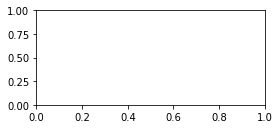

In [31]:
f = plt.figure(figsize=(6*1.5,4*2))
for i,poi_label in enumerate(groups[0]):
    ax = f.add_subplot(4,2,i+1)   
    plot_tserie(poi_label, ax)
#     ax.set_axis_off()
f.tight_layout()

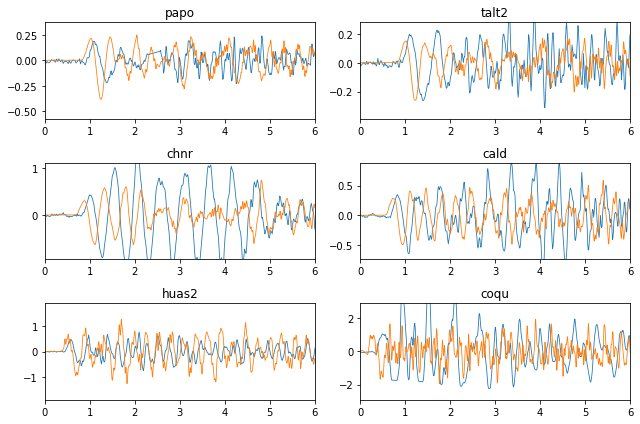

In [12]:
f = plt.figure(figsize=(6*1.5,4*1.5))
for i,poi_label in enumerate(groups[1]):
    ax = f.add_subplot(3,2,i+1)   
    plot_tserie(poi_label, ax)
#     ax.set_axis_off()
f.tight_layout()

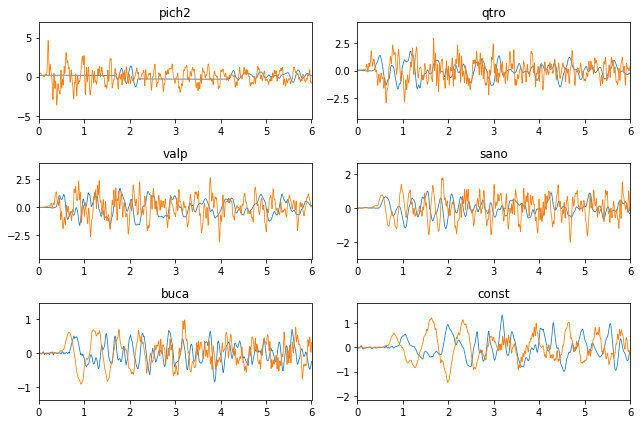

In [13]:
f = plt.figure(figsize=(6*1.5,4*1.5))
for i,poi_label in enumerate(groups[2]):
    ax = f.add_subplot(3,2,i+1)   
    plot_tserie(poi_label, ax)
#     ax.set_axis_off()
f.tight_layout()